In [64]:
import numpy as np
import cv2
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import tkinter
from tkinter import filedialog
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [67]:
path3 = filedialog.askdirectory() #For blue nuclei images

In [68]:
path3

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/npys/bn_nuclei_tiles'

In [5]:

path4 = filedialog.askdirectory() # For paths file


#bn_images=sorted(glob(path3+"/*"))


In [7]:
file_paths=pd.read_csv(path4+"/file_paths_July31_2024_regularization.csv")

In [69]:
path1 = filedialog.askdirectory(title="Images to process")

In [70]:
path1

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt'

In [71]:
img_list=[x for x in sorted(glob(path1+"/*.png"))]
#img_list=[x for x in sorted(glob(path1+"/*/cd3*"))]
print(len(img_list))

600


In [72]:
img_list

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt/000090_gt.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt/000137_gt.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt/000157_gt.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt/000202_gt.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt/000208_gt.png',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/Test/gt/000242_gt.png',
 '/m

In [73]:
path2=filedialog.askdirectory(title="Path to store images")
#########BLUE_NUCLEI####################
os.makedirs(path2+"/bn_nuclei_pred/",exist_ok=True)
os.makedirs(path2+"/bn_nuclei_pred_n/",exist_ok=True)


In [74]:
path2

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/blue_nuclei/After/Data_Oversampled/npys/gt'

In [62]:
for i in img_list:
    print(i[-15:-9])

000090
000137
000157
000202
000208
000242
000288
000289
000304
000331
000367
000420
000506
000549
000561
000563
000565
000594
000636
000676
000714
000816
000829
000849
000868
000887
000889
000912
000957
001039
001076
001115
001124
001167
001180
001187
001188
001189
001204
001243
001295
001394
001411
001433
001440
001507
001514
001527
001558
001575
001613
001625
001647
001673
001696
001701
001706
001746
001798
001832
001838
001860
001863
001890
001891
001901
001958
001994
002008
002027
002052
002067
002129
002274
002289
002315
002421
002437
002488
002555
002562
002643
002710
002716
002758
002767
002793
002827
002830
002834
002967
002975
003075
003137
003141
003184
003240
003289
003308
003317
003327
003399
003414
003441
003460
003501
003518
003590
003701
003709
003716
003745
003748
003767
003821
003874
003908
003912
003917
003931
003957
003974
004011
004079
004163
004175
004210
004215
004253
004266
004287
004297
004314
004350
004352
004369
004482
004499
004544
004656
004702
004735
004793

# Big change - THreshold from 2 to 20

Processing image 0
Processing image 1
Processing image 2
Processing image 3
Processing image 4
Processing image 5
Processing image 6
An unexpected error occurred while processing image 6: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4030: error: (-215:Assertion failed) func != 0 in function 'resize'

Processing image 7
Processing image 8
Processing image 9
Processing image 10
Processing image 11
Processing image 12
Processing image 13
Processing image 14
An unexpected error occurred while processing image 14: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4030: error: (-215:Assertion failed) func != 0 in function 'resize'

Processing image 15
An unexpected error occurred while processing image 15: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4030: error: (-215:Assertion failed) func != 0 in function 'resize'

Processing image 16
An unexpected error occurred while processing image 16: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4030: error: (-2

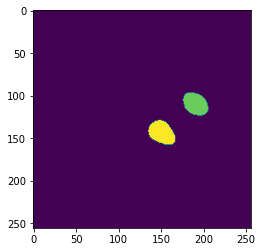

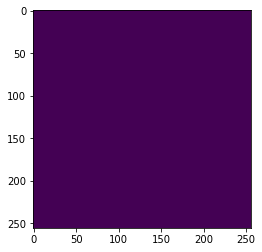

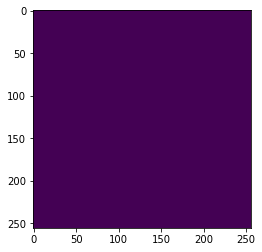

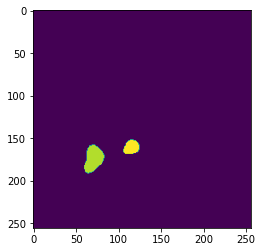

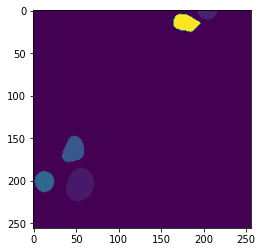

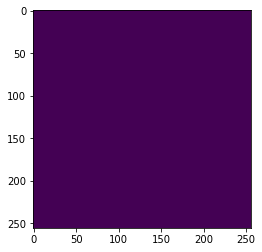

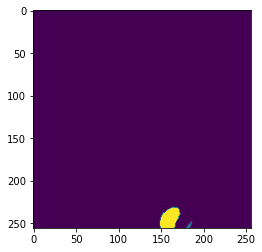

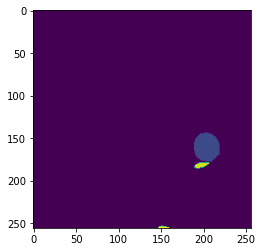

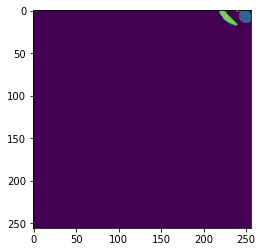

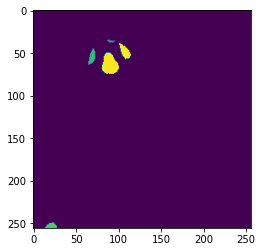

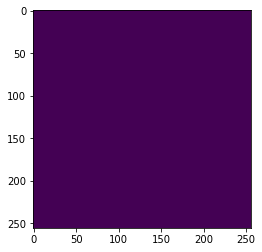

In [75]:
for y in range(len(img_list)):
    try:
        img = cv2.imread(img_list[y])  # Read H&E overlapped image
        print(f"Processing image {y}")
        b, g, r = cv2.split(img)  # Get red channel
        
        ret, thresh1 = cv2.threshold(r, 2, 255, cv2.THRESH_BINARY)  # Threshold
        bn = np.load(path3 + "/" + img_list[y][-13:-7] + ".npy")  # Read blue nuclei
        
        # Resize bn to match thresh1 if they have different shapes
        if bn.shape != thresh1.shape:
            bn = cv2.resize(bn, (thresh1.shape[1], thresh1.shape[0]))
        
        result = bn * np.logical_and(bn, thresh1)  # Bitwise operation
        result2 = bn - result
        
        np.save(path2 + "/bn_nuclei_pred/" + f"{y:06d}" + ".npy", result)
        np.save(path2 + "/bn_nuclei_pred_n/" + f"{y:06d}" + ".npy", result2)
        
        if y % 50 == 0:
            plt.figure()
            plt.imshow(result)
    
    except ValueError as ve:
        print(f"ValueError occurred while processing image {y}: {ve}")
        print(f"Shapes - bn: {bn.shape}, thresh1: {thresh1.shape}")
        continue
    except Exception as e:
        print(f"An unexpected error occurred while processing image {y}: {e}")
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

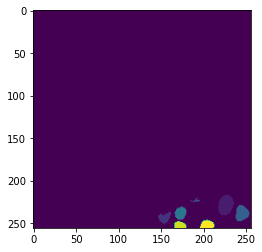

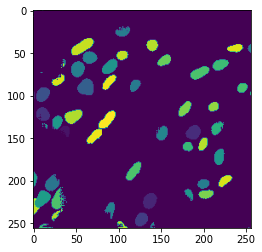

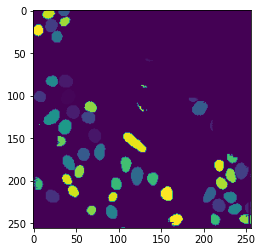

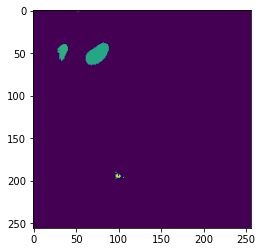

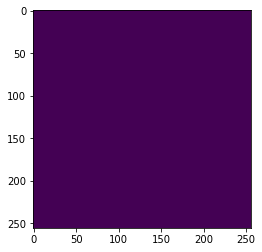

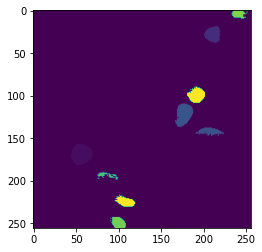

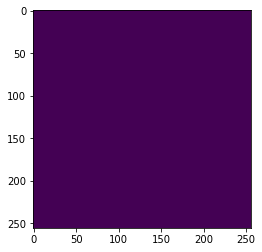

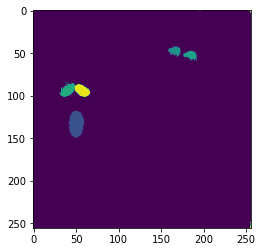

In [25]:

for y in range(len(img_list)):

    #l3.append(y.split("/")[-1]) 
    img=cv2.imread(img_list[y]) #Read H&E overlapped image
    print(y)
    b,g,r=cv2.split(img) #Get red channel


    
    ret,thresh1 = cv2.threshold(r,2,255,cv2.THRESH_BINARY) #Threshold
    bn=np.load(path3+"/"+file_paths.loc[y][1].split(".")[0]+".npy") #Read blue nuclei
    #ret,thresh2 = cv2.threshold(bn,0,255,cv2.THRESH_BINARY) #Binary mask
    result=bn*np.logical_and(bn,thresh1) #Bitwise operation
    result2=bn-result
    #plt.imsave(path2+"/bn_nuclei_pred/"+f"{y:06d}"+".png",result,cmap="gray")#store
    np.save(path2+"/bn_nuclei_pred/"+f"{y:06d}"+".npy",result)
    np.save(path2+"/bn_nuclei_pred_n/"+f"{y:06d}"+".npy",result2)
    if(y%50==0):
        plt.figure()
        plt.imshow(result)

# Older code

In [83]:
zero=np.zeros([256,256],np.uint8)
x=0
lst=[]
l2=[]
l3=[]
for y in img_list:

    l3.append(y.split("/")[-1])
    
    img=cv2.imread(y)
    b,g,r=cv2.split(img)
    ret,thresh1 = cv2.threshold(r,2,255,cv2.THRESH_BINARY)
    
    #thresh1=cv2.adaptiveThreshold(r,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     #       cv2.THRESH_BINARY_INV,11,2)
    #########FOR INTENSITY VARIATIONS####################
    plt.imsave(path2+"/intensity_img/"+f"{x:06d}"+".png",r*thresh1,cmap="gray")
    #lst.append(sum((thresh1*g/(255*255)).reshape(-1)))
    #########BINARY ONLY####################
    plt.imsave(path2+"/images/"+f"{x:06d}"+".png",thresh1,cmap="gray")
    #lst.append(sum((thresh1).reshape(-1)/255))
    ###################################################
    x=x+1

            